In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd .read_csv('/content/drive/MyDrive/rehab-ai-data/KiMoRe_final/KiMoRe_data_movenet_features.csv')
data

ID exercise                                              video  \
0    P_ID11      Es2  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
1    P_ID11      Es3  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
2    P_ID11      Es1  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
3    P_ID11      Es4  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
4    P_ID11      Es5  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
..      ...      ...                                                ...   
385   E_ID9      Es5  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
386   E_ID9      Es2  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
387   E_ID9      Es3  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
388   E_ID9      Es4  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
389   E_ID9      Es1  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   

                                       joint_positions  \
0    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
1    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
2    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
3    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
4    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
..                                                 ...   
385  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
386  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
387  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
388  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   
389  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...   

                                        joint_features  clinical_score  \
0    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       12.000000   
1    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       12.666667   
2    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       14.666667   
3    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       15.333333   
4    /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       12.666667   
..                                                 ...             ...   
385  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       46.000000   
386  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       44.666667   
387  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       48.666667   
388  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       42.666667   
389  /content/drive/MyDrive/rehab-ai-data/KiMoRe_rg...       50.000000   

     #frames  
0        425  
1        394  
2        529  
3        363  
4        438  
..       ...  
385      431  
386      578  
387      434  
388      430  
389      439  

[390 rows x 7 columns]

In [ ]:
def subplot(values, joint, type, coordinate, smooth=False):
  fig_title = f'{type} - {joint} ({coordinate})'
  if smooth:
    fig_title+=' - Smoothed'
  plt.title(fig_title)
  plt.plot(values)
  plt.xlabel('Frame')
  plt.ylabel('Position')
  plt.grid(True)

def plot_joint_positions(data, exercise, joint, smooth=False):
  expert = pd.read_csv(data[(data['exercise']==exercise) & (data['ID'].str.startswith('E'))]['joint_positions'].iloc[0])
  backpain = pd.read_csv(data[(data['exercise']==exercise) & (data['ID'].str.startswith('B'))]['joint_positions'].iloc[0])
  fig_title = f'{exercise}_{joint}'

  if smooth:
    smoothing_window=15
    expert = expert.rolling(smoothing_window).mean()
    backpain = backpain.rolling(smoothing_window).mean()
    fig_title+='_smoothed'

  fig, axs = plt.subplots(2, 2, figsize=(8, 8))

  #Expert - Joint (x) - Plot
  plt.subplot(2,2,1)
  subplot(expert[f'{joint}_x'], (joint.split("_")[1]).capitalize(), 'Expert', 'x', smooth)

  #Expert - Joint (y) - Plot
  plt.subplot(2,2,3)
  subplot(expert[f'{joint}_y'], (joint.split("_")[1]).capitalize(), 'Expert', 'y', smooth)

  #BackPain Patient - Joint (x) - Plot
  plt.subplot(2,2,2)
  subplot(backpain[f'{joint}_x'], (joint.split("_")[1]).capitalize(), 'BackPain', 'x', smooth)

  #BackPain Patient - Joint (y) - Plot
  plt.subplot(2,2,4)
  subplot(backpain[f'{joint}_y'], (joint.split("_")[1]).capitalize(), 'BackPain', 'y', smooth)

  plt.tight_layout()

  plt.savefig(f'/content/drive/MyDrive/rehab-ai-data/data_engineering_plots/{fig_title}.png', dpi=300)

  plt.show()

In [ ]:
def subplot_feature(values, feature, type):
  fig_title = f'{type} - {feature[0]} {feature[1]} {feature[2]}'
  plt.title(fig_title)
  plt.plot(values)
  plt.xlabel('Frame')
  plt.ylabel('Angle')
  plt.grid(True)

def plot_joint_features(data, exercise, feature, smooth=False):
  expert = pd.read_csv(data[(data['exercise']==exercise) & (data['ID'].str.startswith('E'))]['joint_features'].iloc[0])
  backpain = pd.read_csv(data[(data['exercise']==exercise) & (data['ID'].str.startswith('B'))]['joint_features'].iloc[0])
  fig_title = f'{exercise}_{feature}'

  if smooth:
    smoothing_window=15
    expert = expert.rolling(smoothing_window).mean()
    backpain = backpain.rolling(smoothing_window).mean()
    fig_title+='_smoothed'

  fig, axs = plt.subplots(1, 2, figsize=(8, 8))

  #Expert - feature - Plot
  plt.subplot(1,2,1)
  subplot_feature(expert[feature], ((feature.split("_")[1]).capitalize(), (feature.split("_")[2]).capitalize(), (feature.split("_")[3]).capitalize()), 'Expert')

  #BackPain Patient - feature (y) - Plot
  plt.subplot(1,2,2)
  subplot_feature(backpain[feature], ((feature.split("_")[1]).capitalize(), (feature.split("_")[2]).capitalize(), (feature.split("_")[3]).capitalize()), 'BackPain')

  plt.tight_layout()

  plt.savefig(f'/content/drive/MyDrive/rehab-ai-data/data_engineering_plots/{fig_title}.png', dpi=300)

  plt.show()

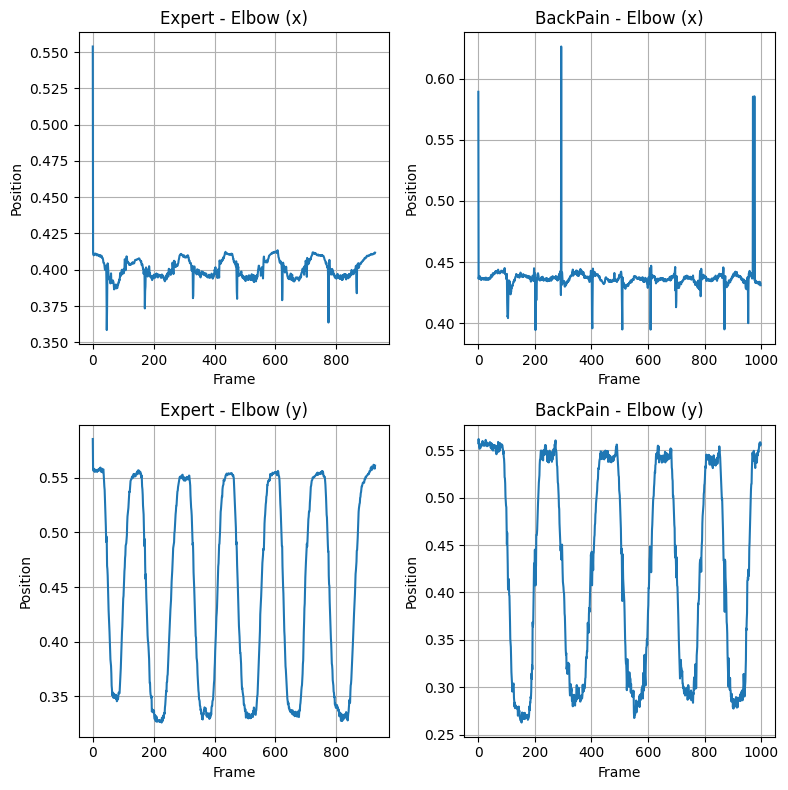

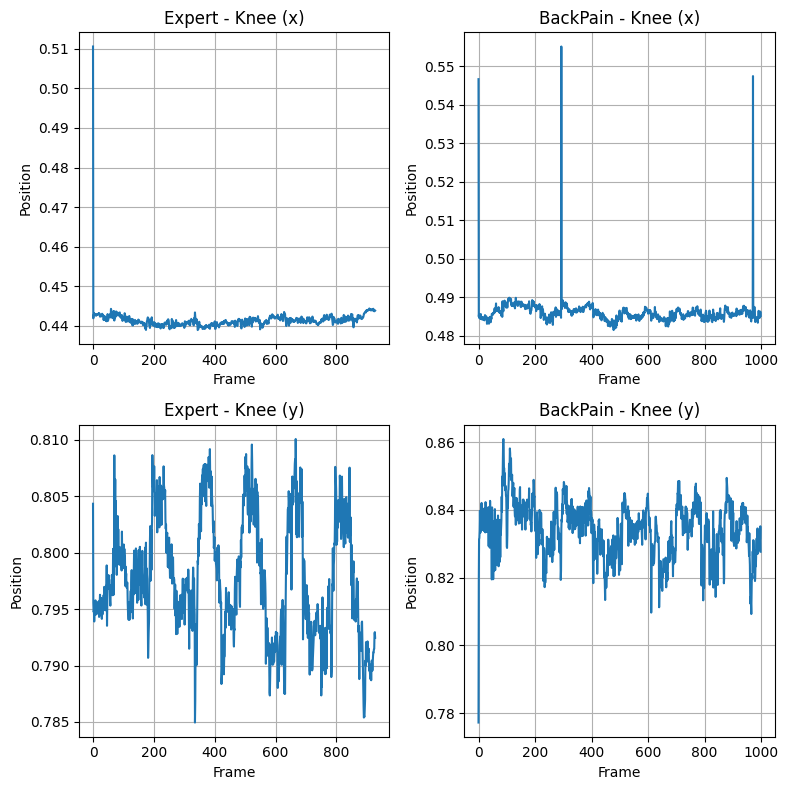

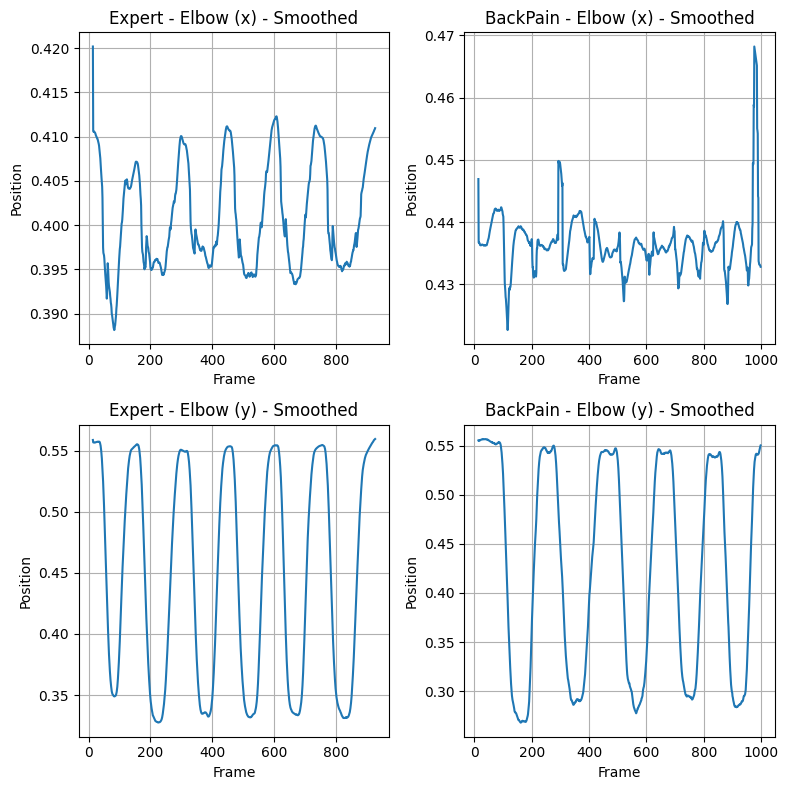

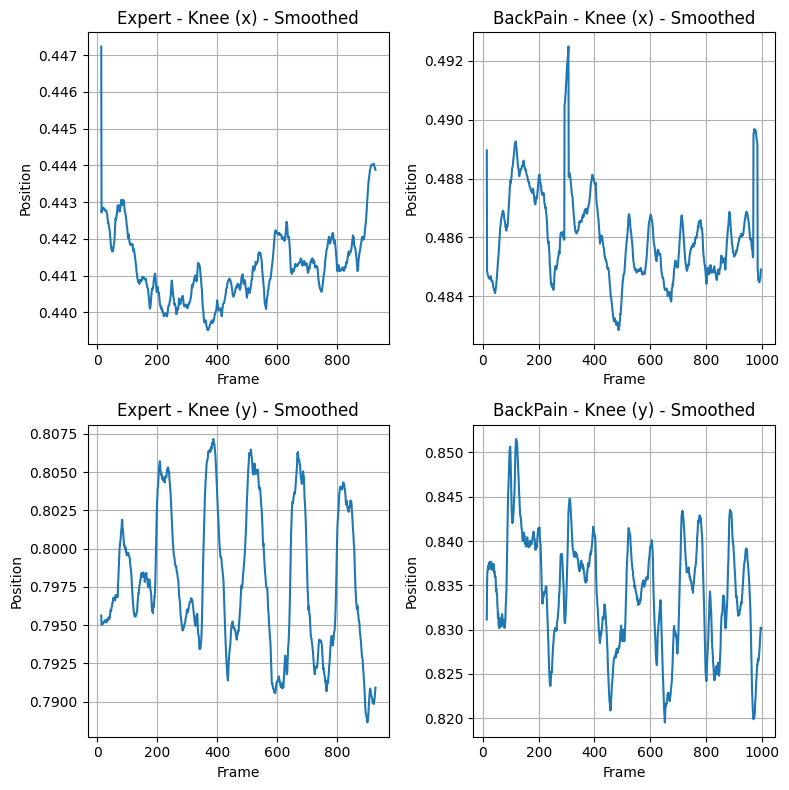

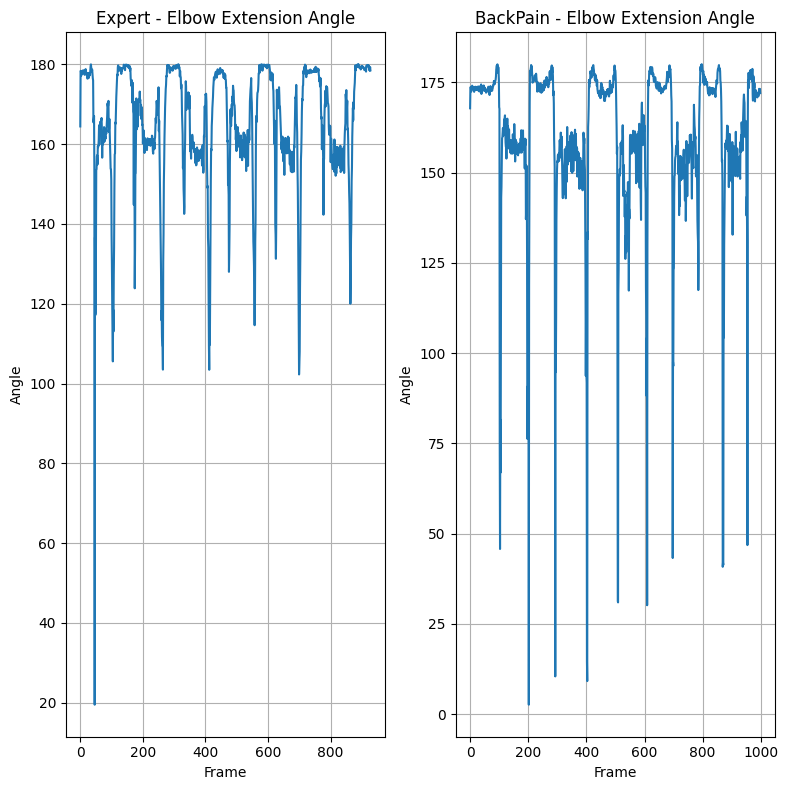

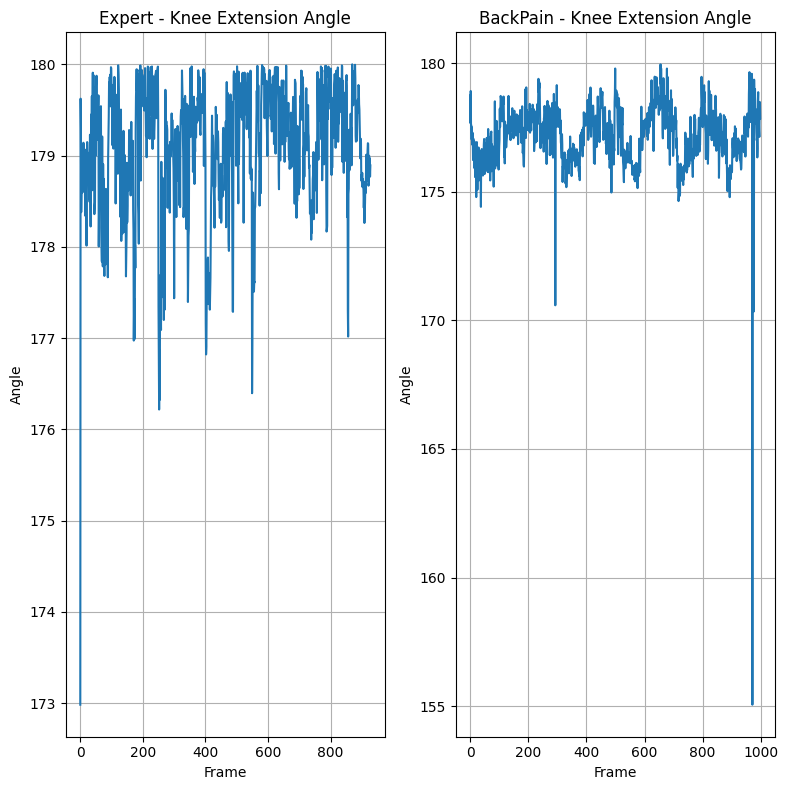

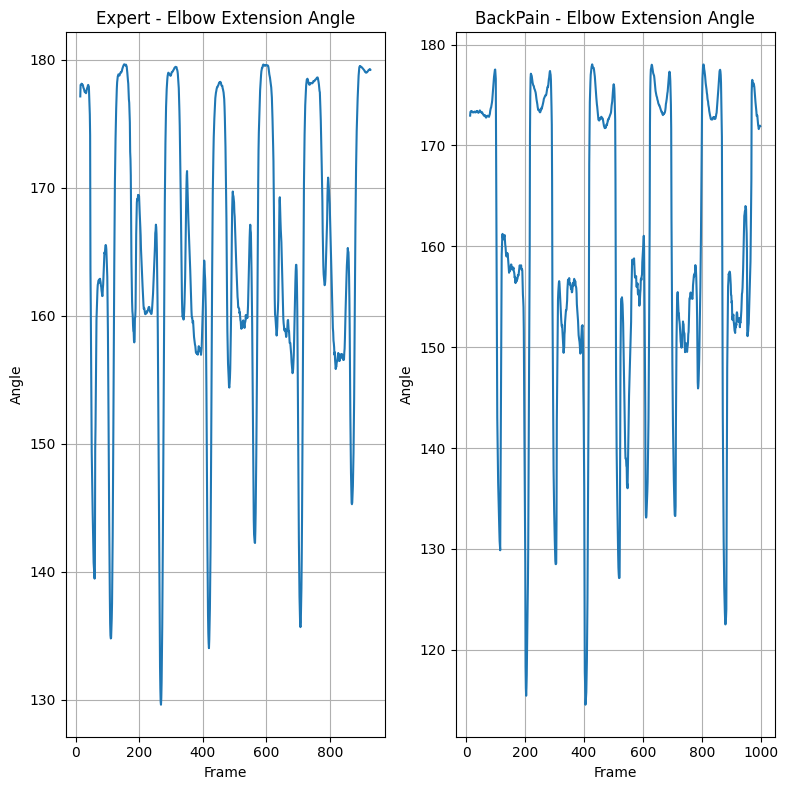

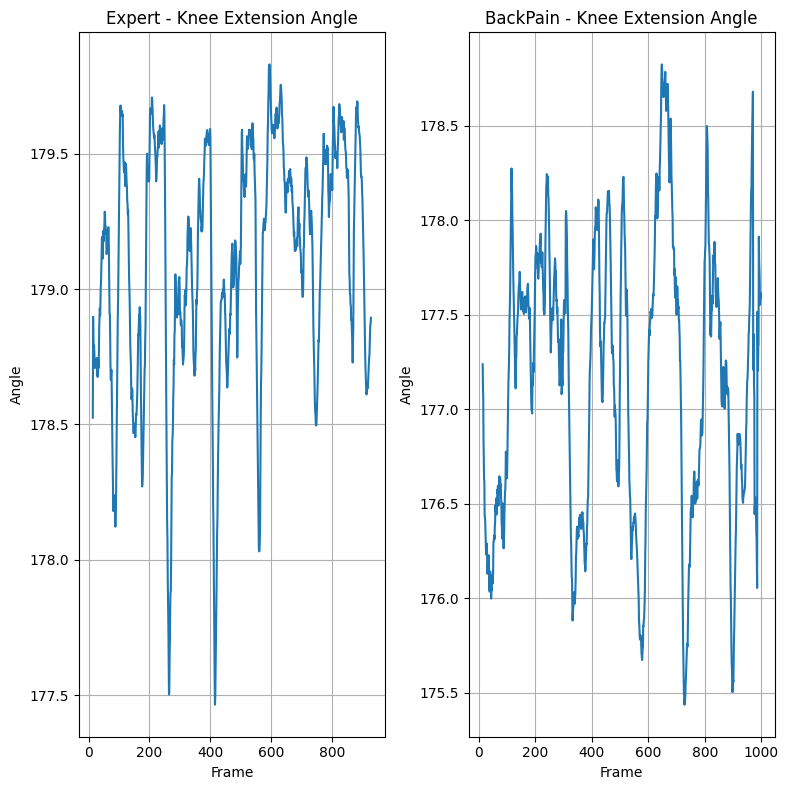

In [ ]:
plot_joint_positions(data, 'Es1', 'right_elbow')
print('\n\n')
plot_joint_positions(data, 'Es1', 'right_knee')
print('\n\n')
plot_joint_positions(data, 'Es1', 'right_elbow', smooth=True)
print('\n\n')
plot_joint_positions(data, 'Es1', 'right_knee', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es1', 'right_elbow_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es1', 'right_knee_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es1', 'right_elbow_extension_angle', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es1', 'right_knee_extension_angle', smooth=True)

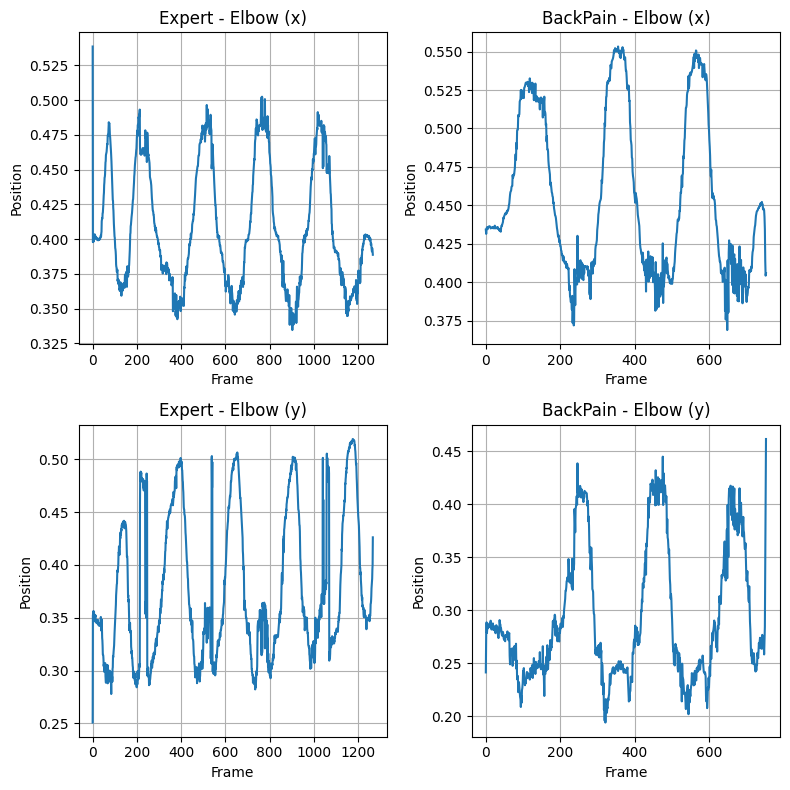

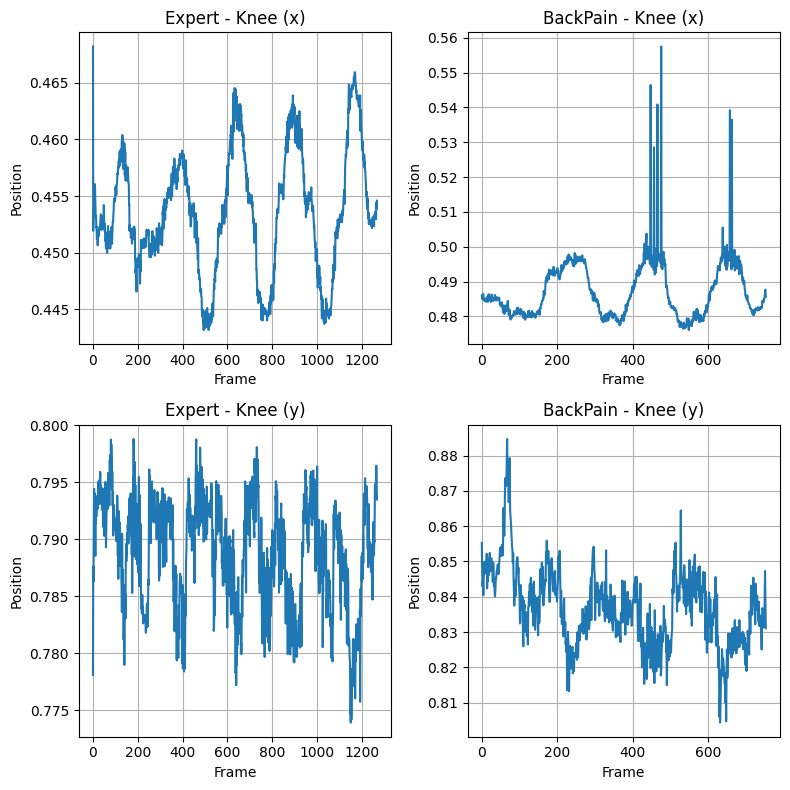

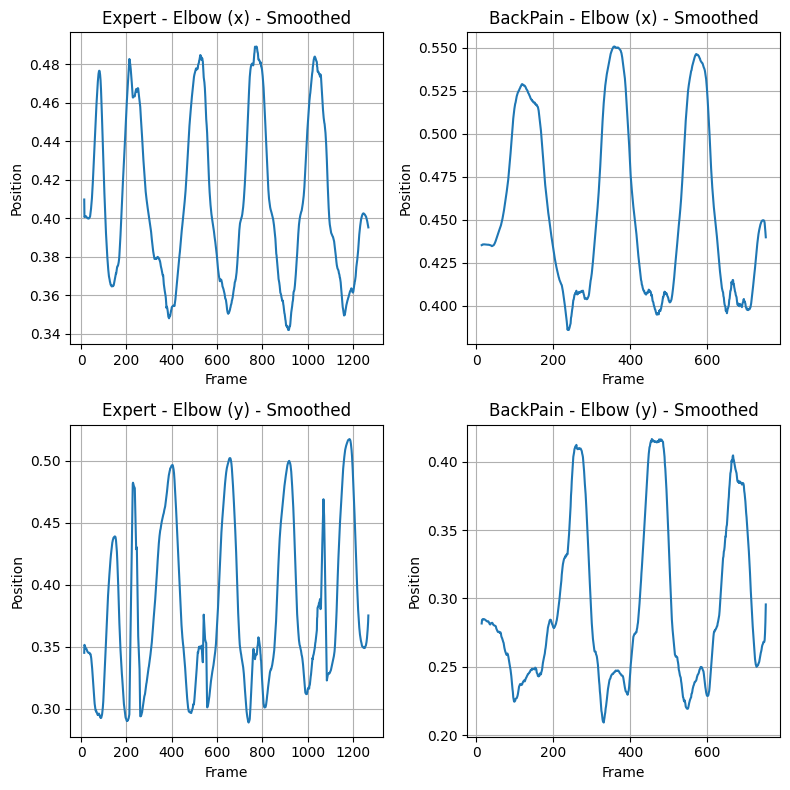

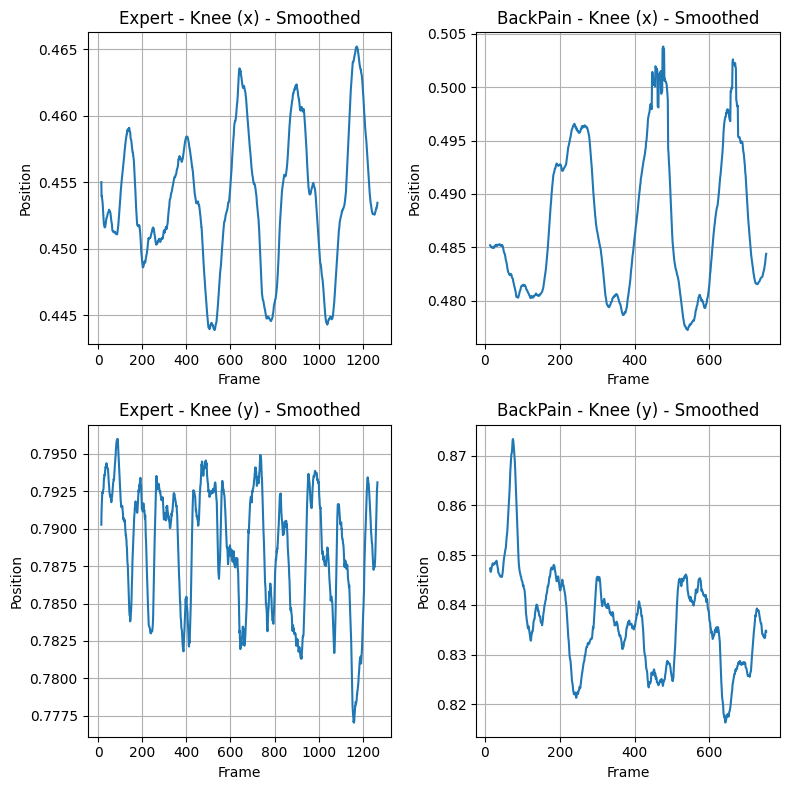

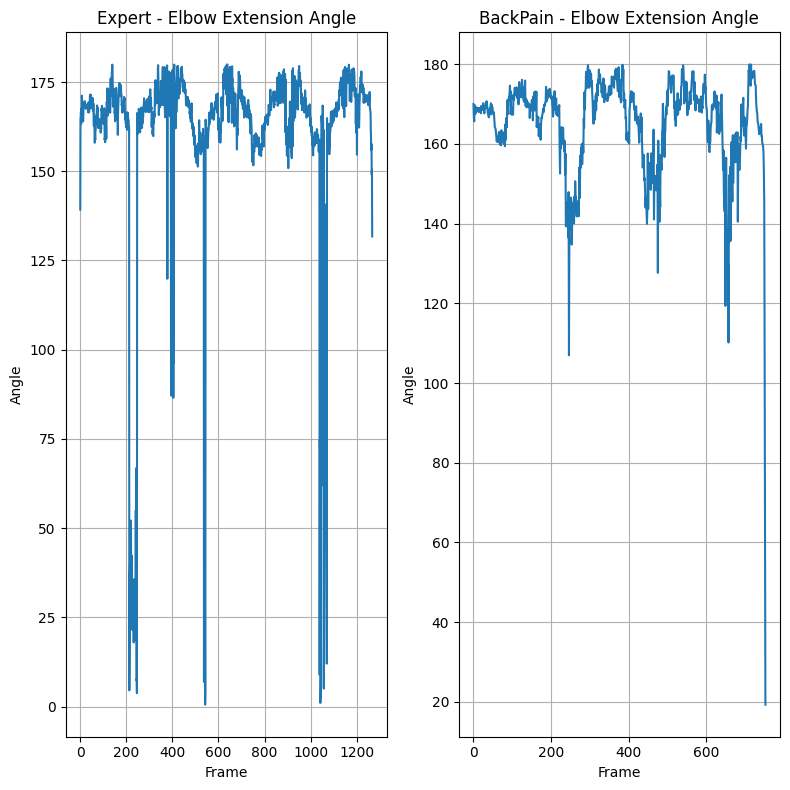

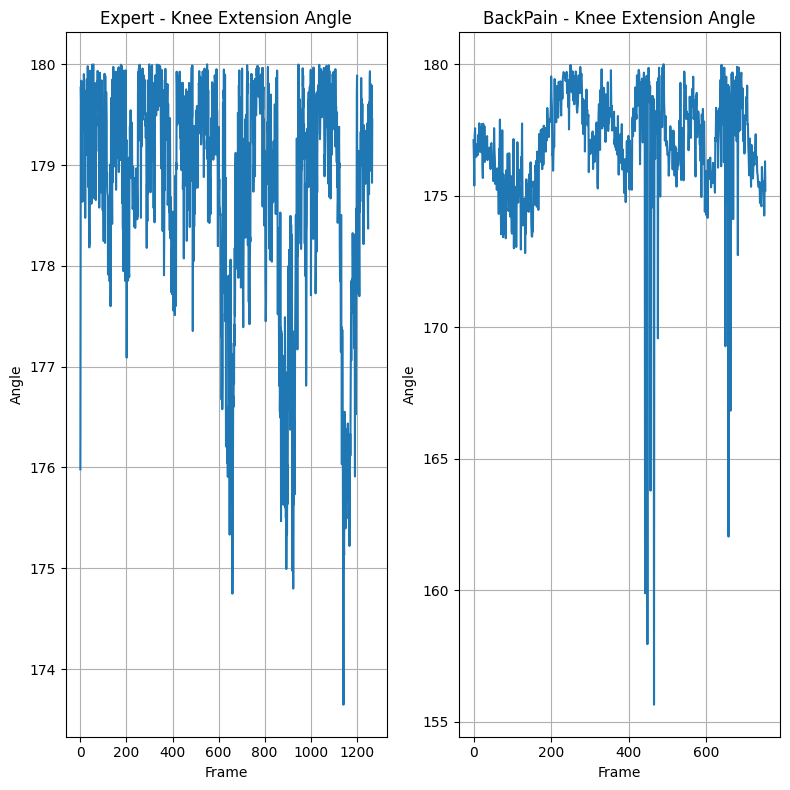

In [ ]:
plot_joint_positions(data, 'Es2', 'right_elbow')
print('\n\n')
plot_joint_positions(data, 'Es2', 'right_knee')
print('\n\n')
plot_joint_positions(data, 'Es2', 'right_elbow', smooth=True)
print('\n\n')
plot_joint_positions(data, 'Es2', 'right_knee', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es2', 'right_elbow_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es2', 'right_knee_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es2', 'right_elbow_extension_angle', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es2', 'right_knee_extension_angle', smooth=True)

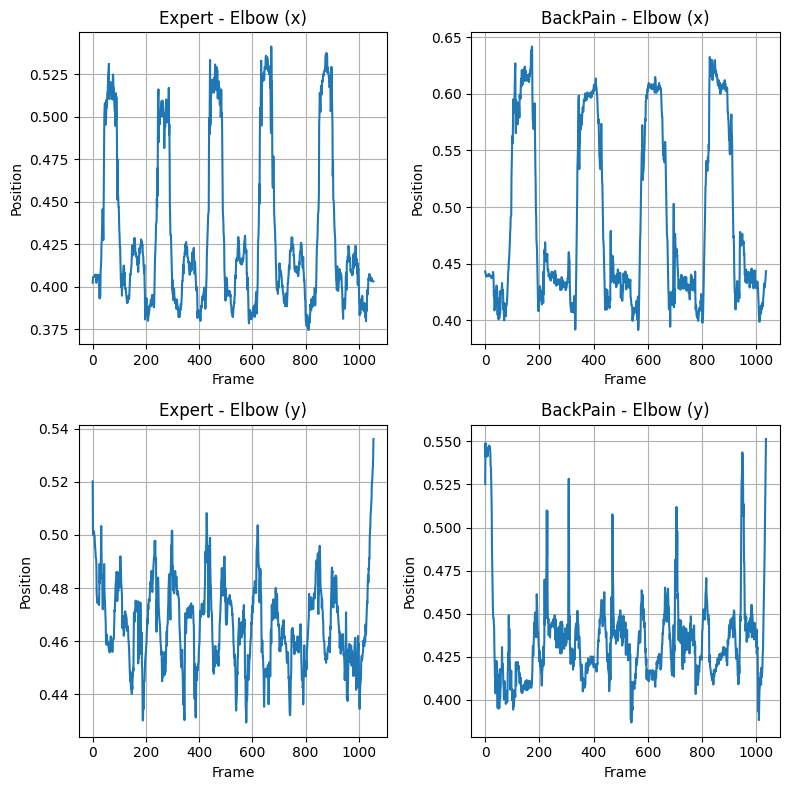

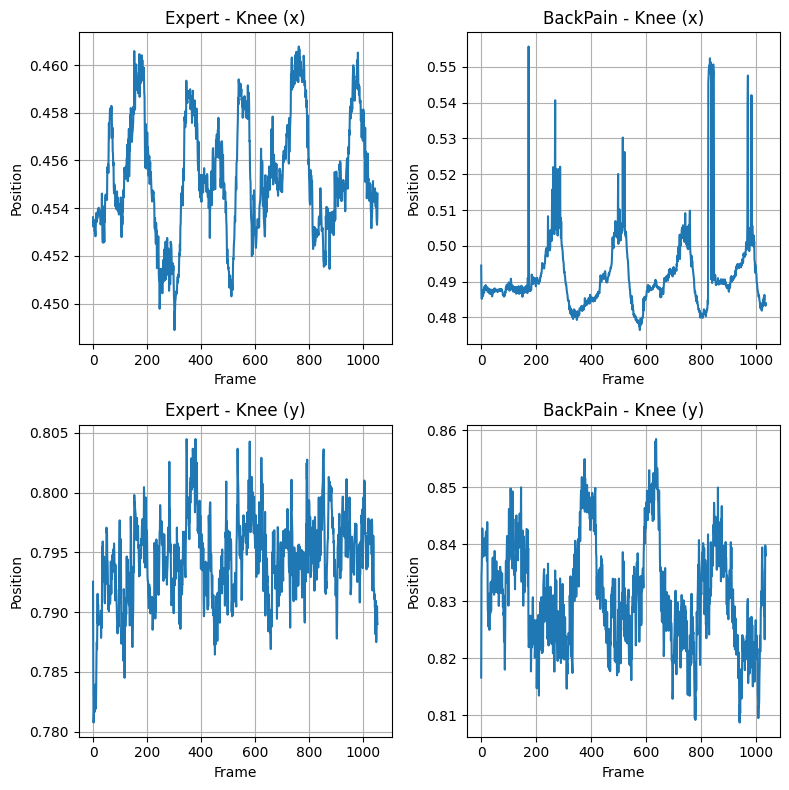

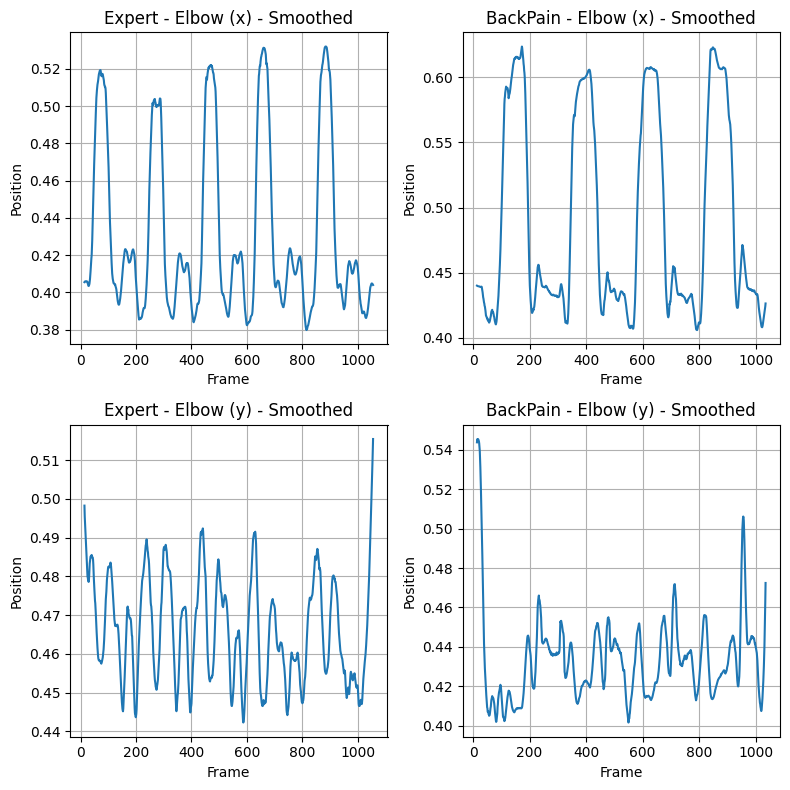

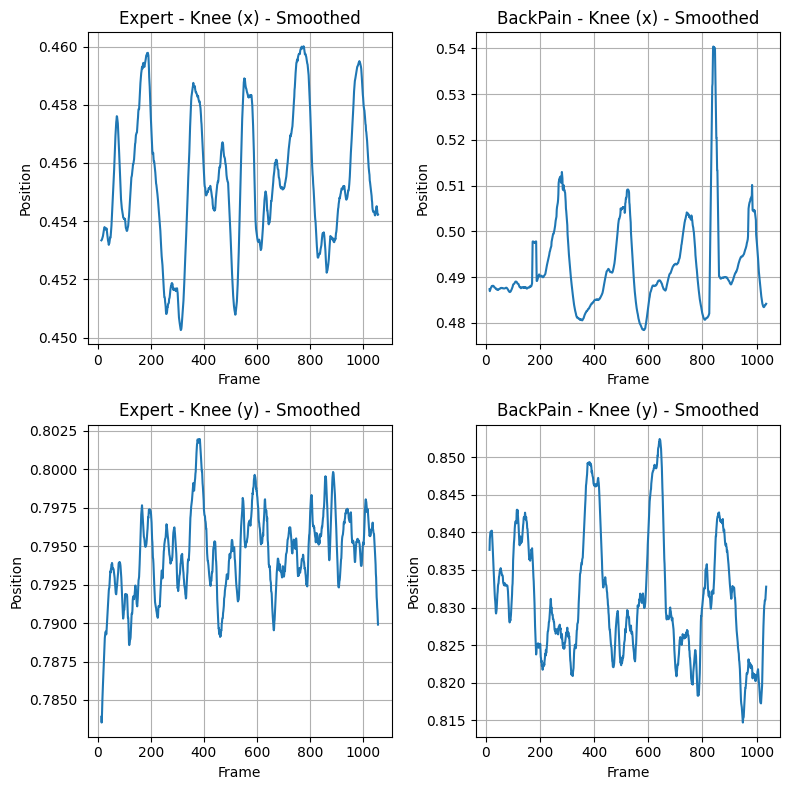

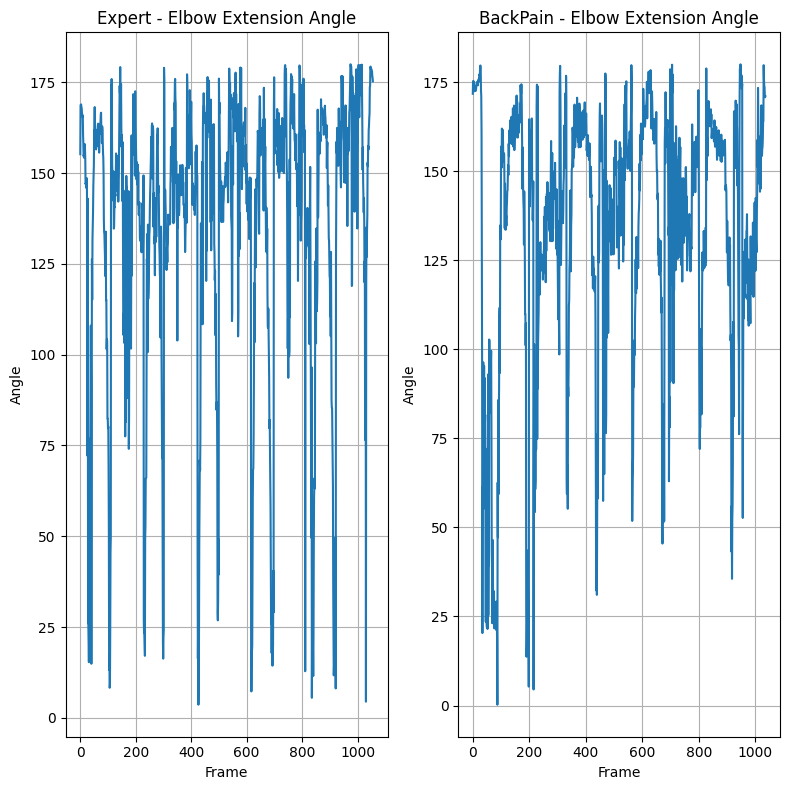

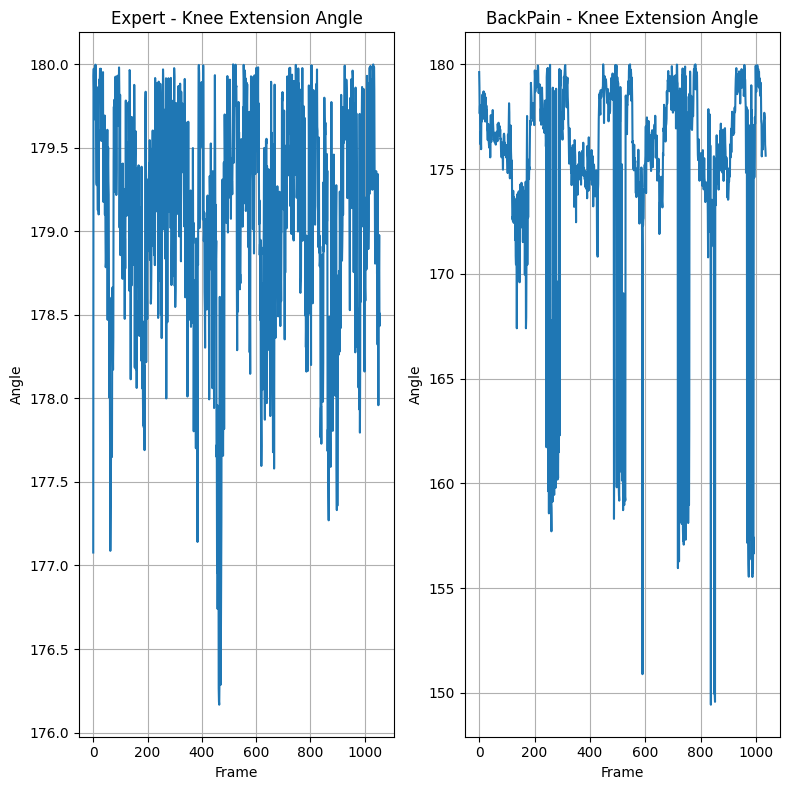

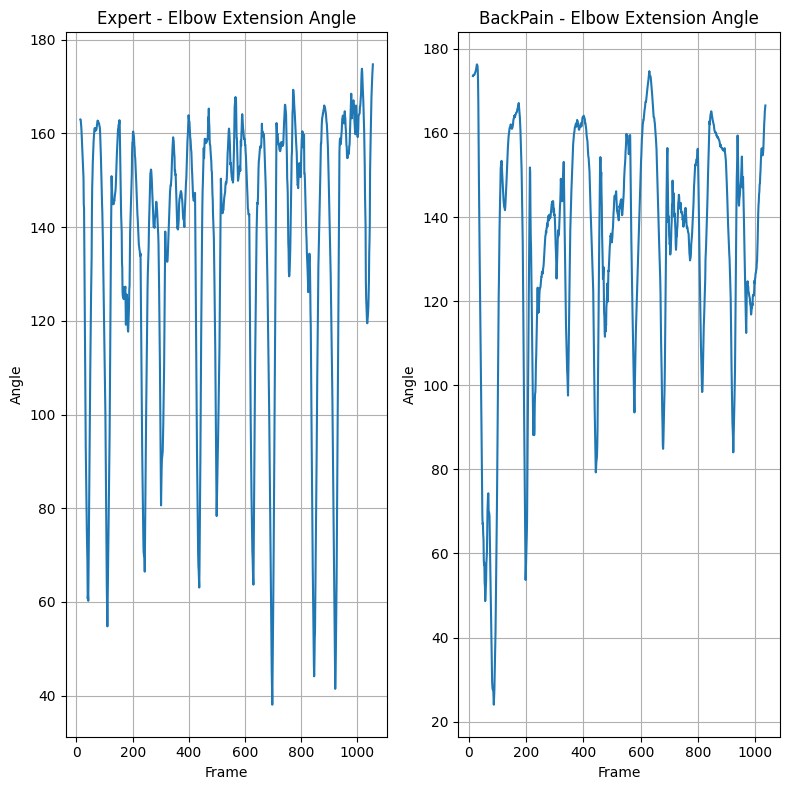

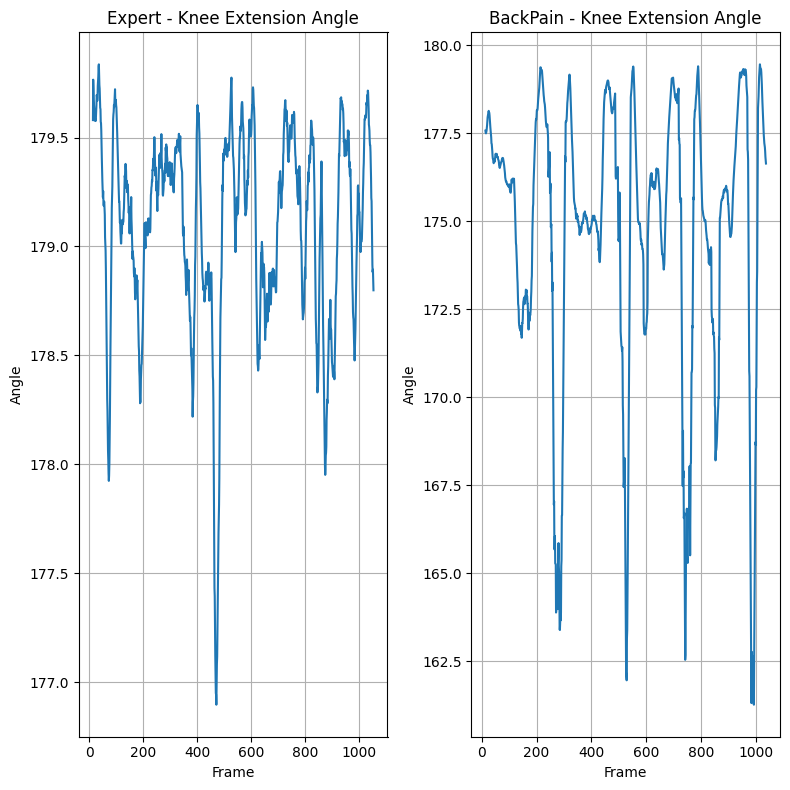

In [ ]:
plot_joint_positions(data, 'Es3', 'right_elbow')
print('\n\n')
plot_joint_positions(data, 'Es3', 'right_knee')
print('\n\n')
plot_joint_positions(data, 'Es3', 'right_elbow', smooth=True)
print('\n\n')
plot_joint_positions(data, 'Es3', 'right_knee', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es3', 'right_elbow_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es3', 'right_knee_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es3', 'right_elbow_extension_angle', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es3', 'right_knee_extension_angle', smooth=True)

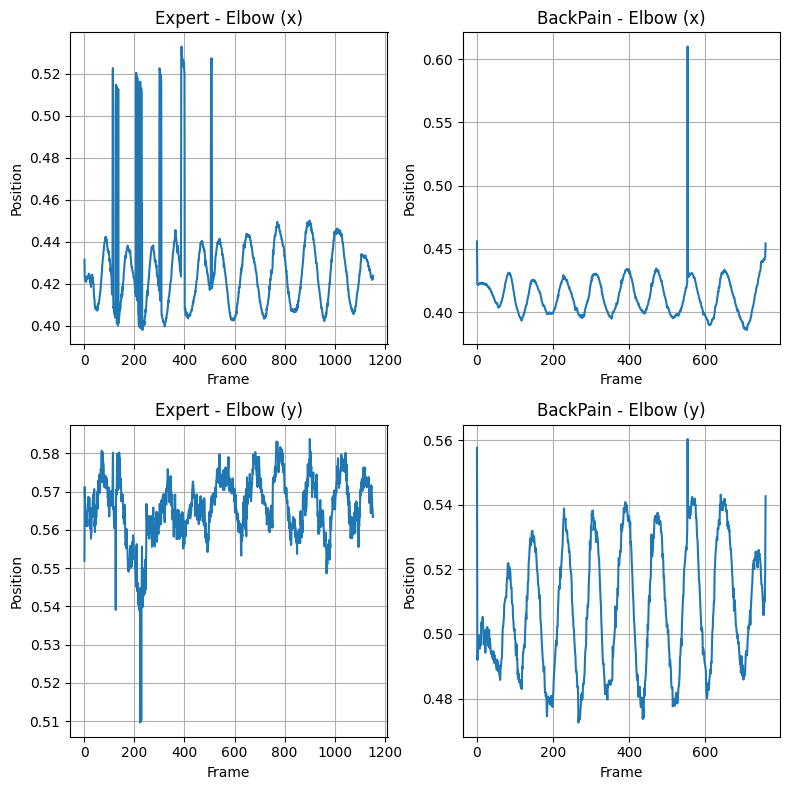

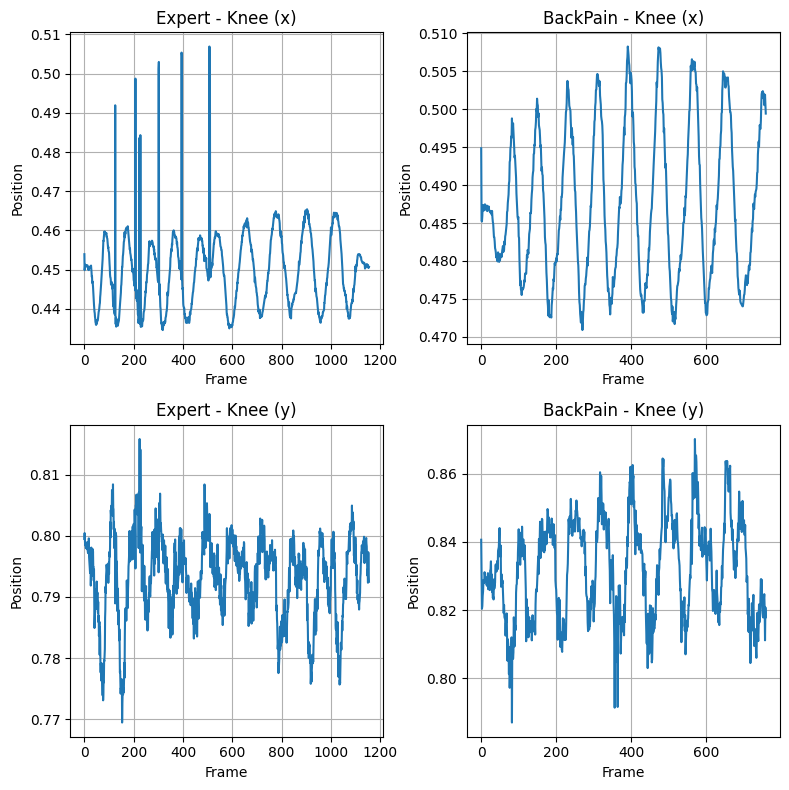

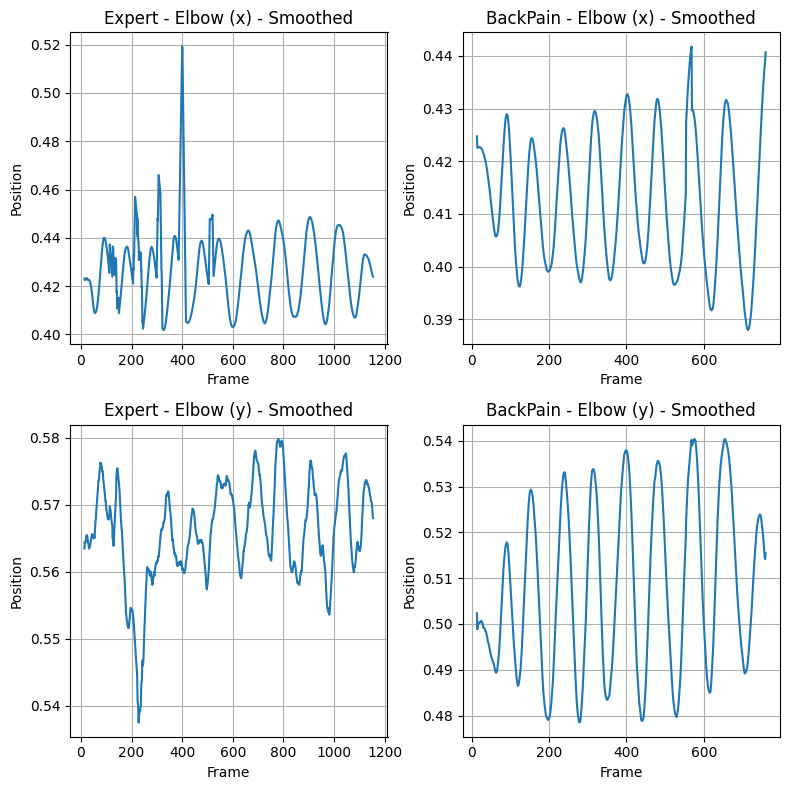

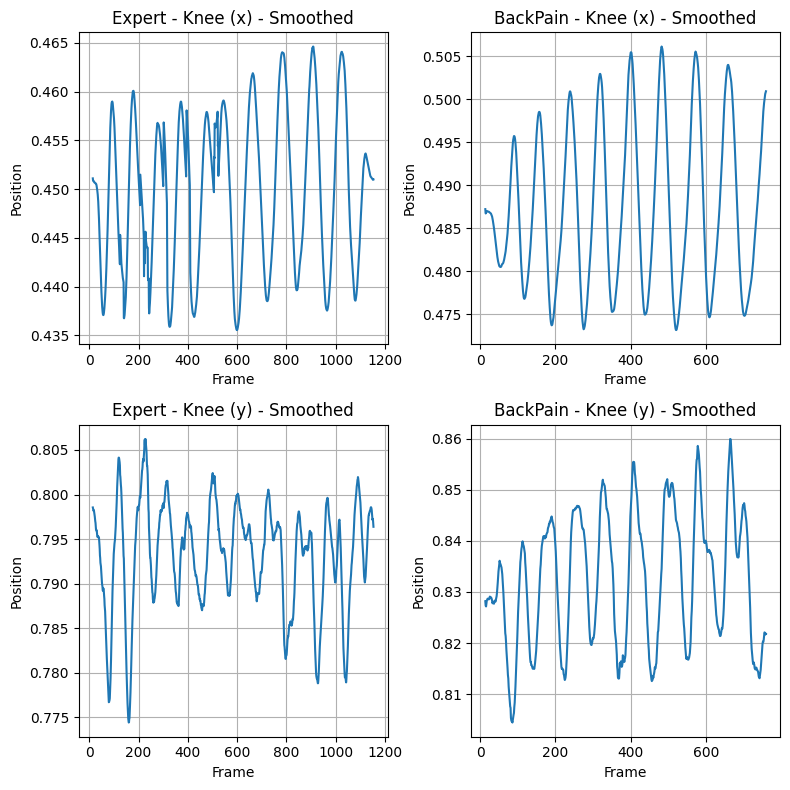

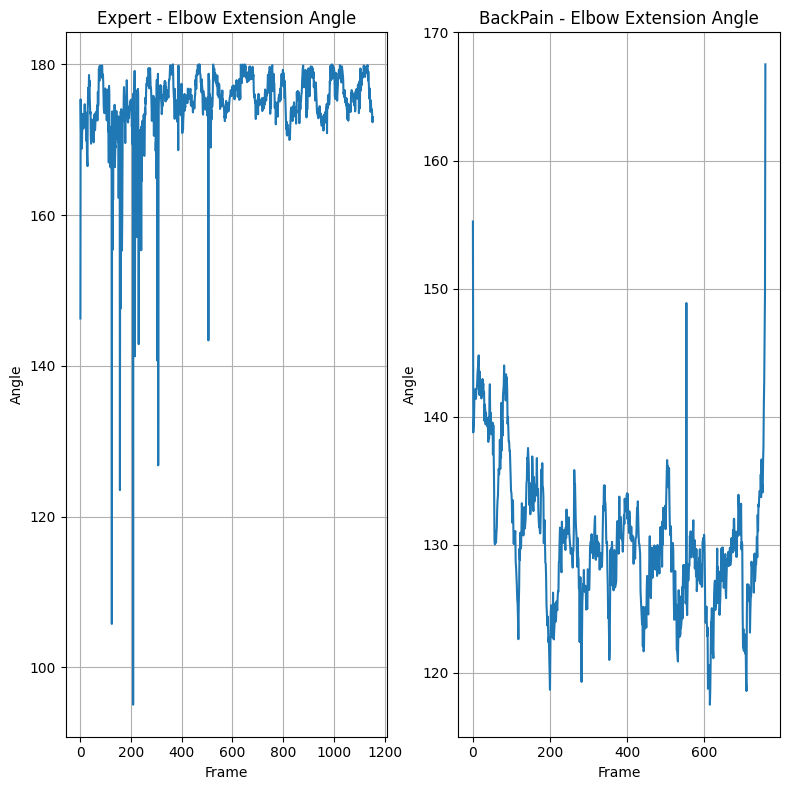

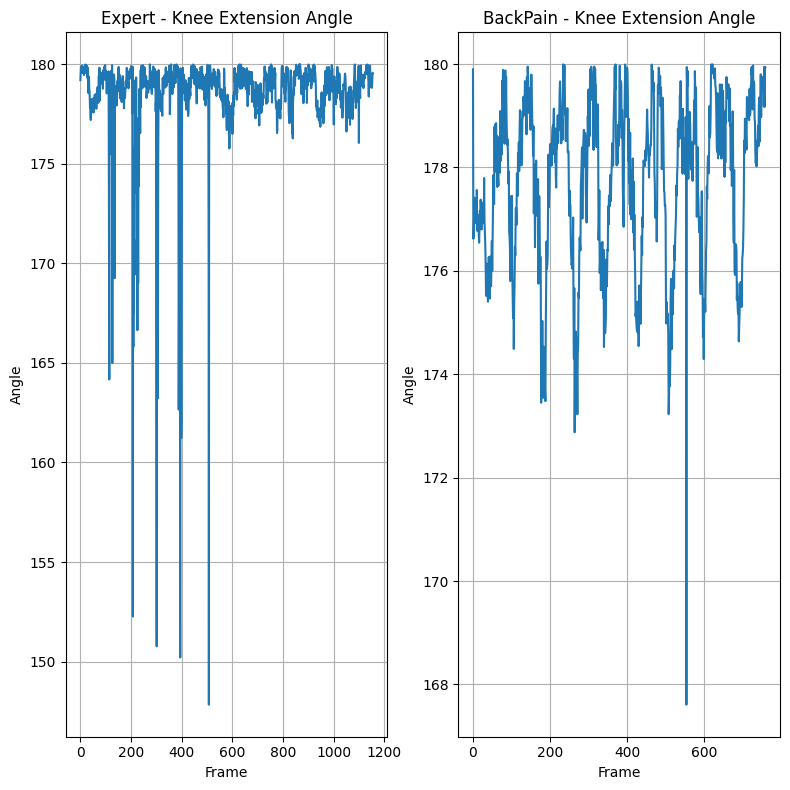

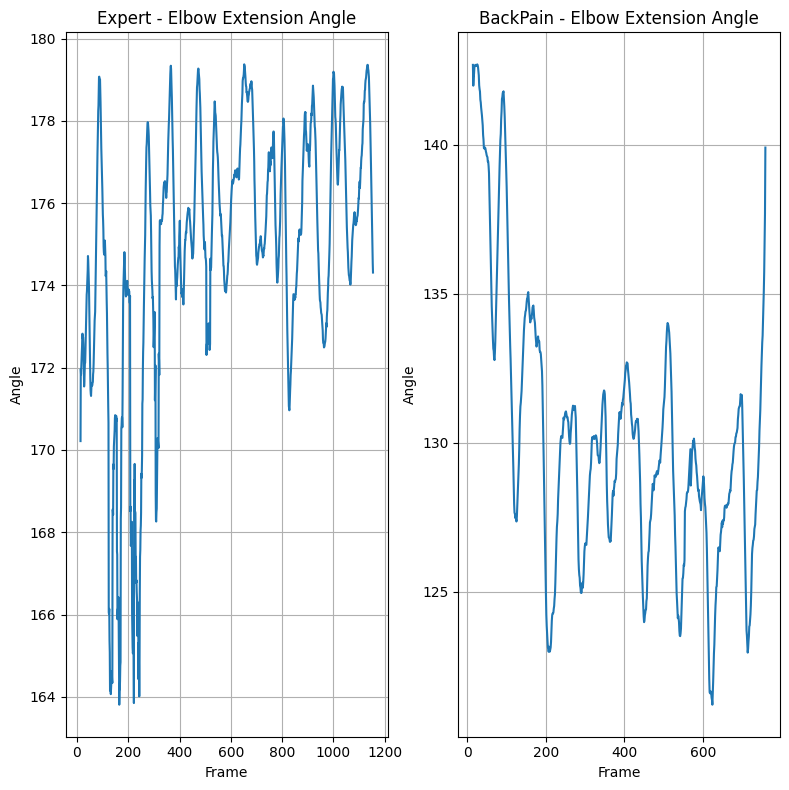

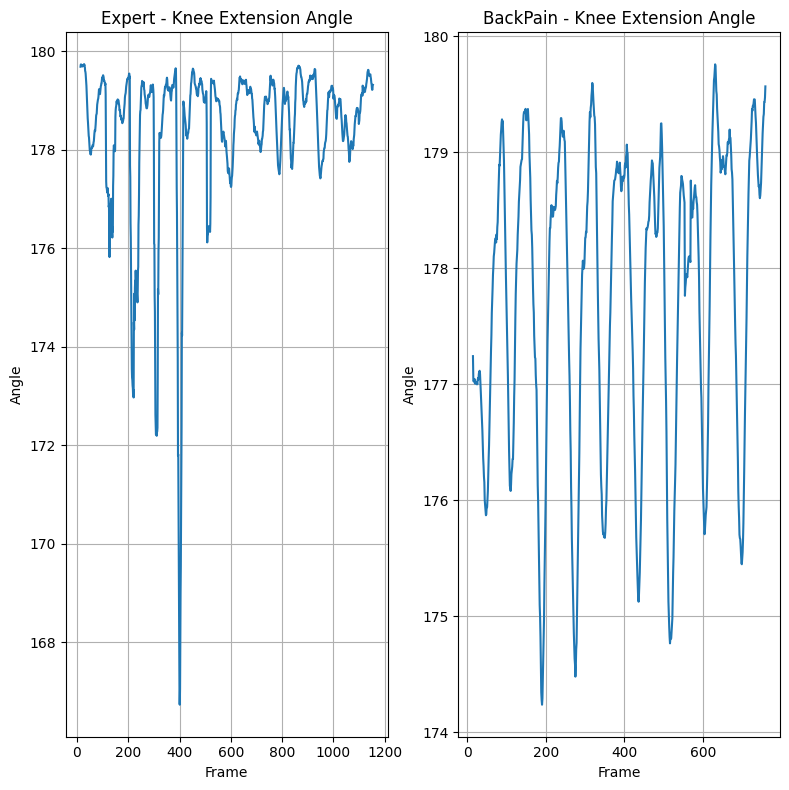

In [ ]:
plot_joint_positions(data, 'Es4', 'right_elbow')
print('\n\n')
plot_joint_positions(data, 'Es4', 'right_knee')
print('\n\n')
plot_joint_positions(data, 'Es4', 'right_elbow', smooth=True)
print('\n\n')
plot_joint_positions(data, 'Es4', 'right_knee', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es4', 'right_elbow_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es4', 'right_knee_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es4', 'right_elbow_extension_angle', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es4', 'right_knee_extension_angle', smooth=True)

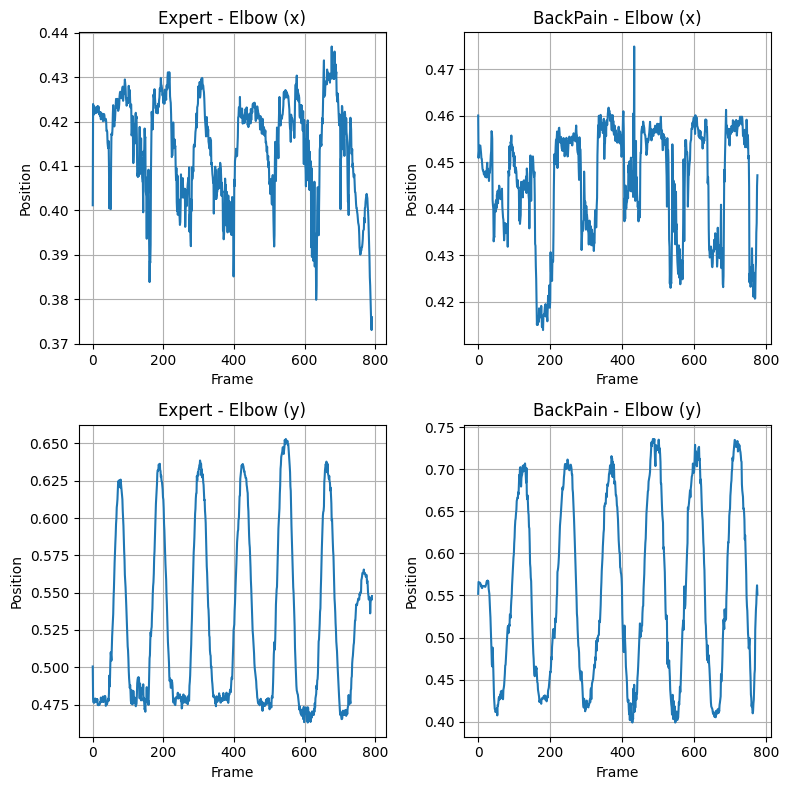

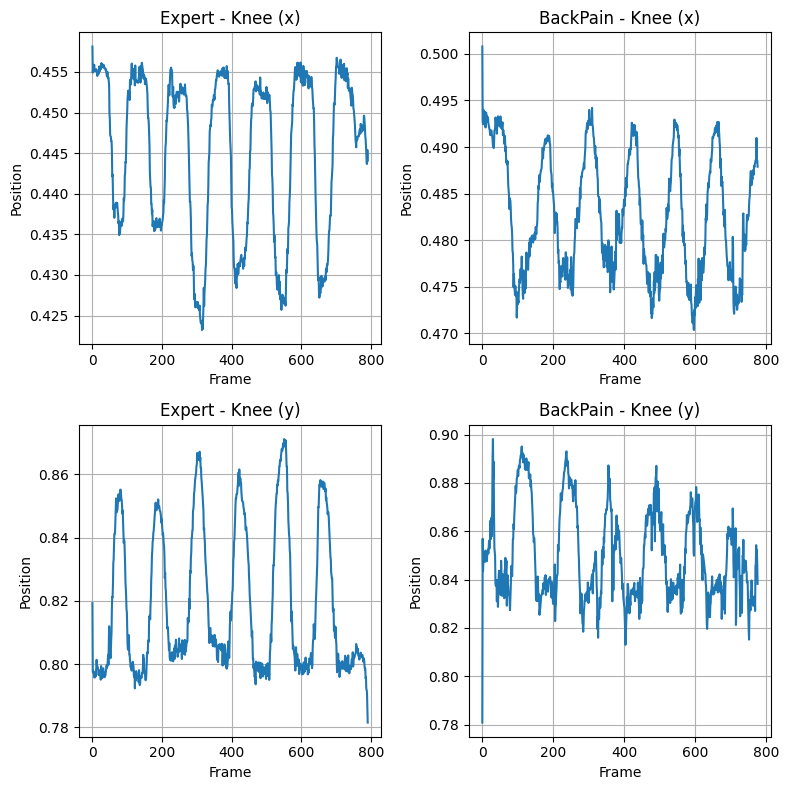

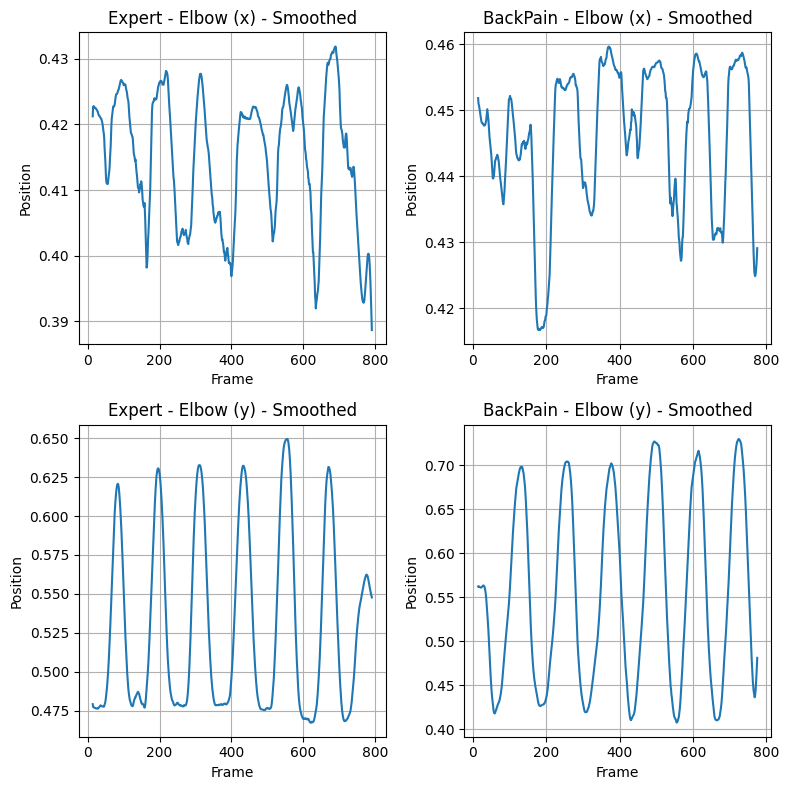

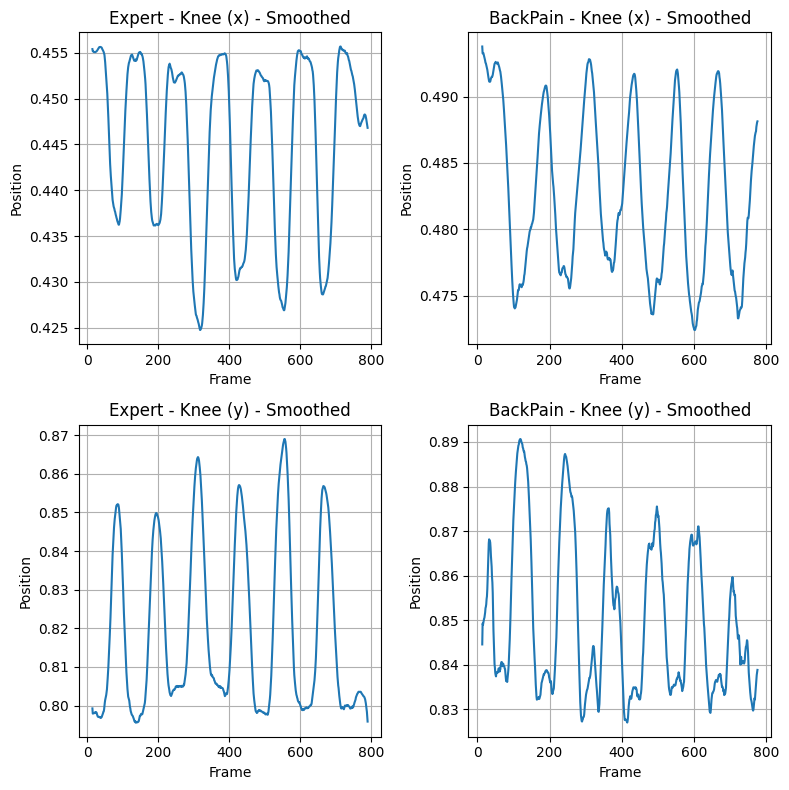

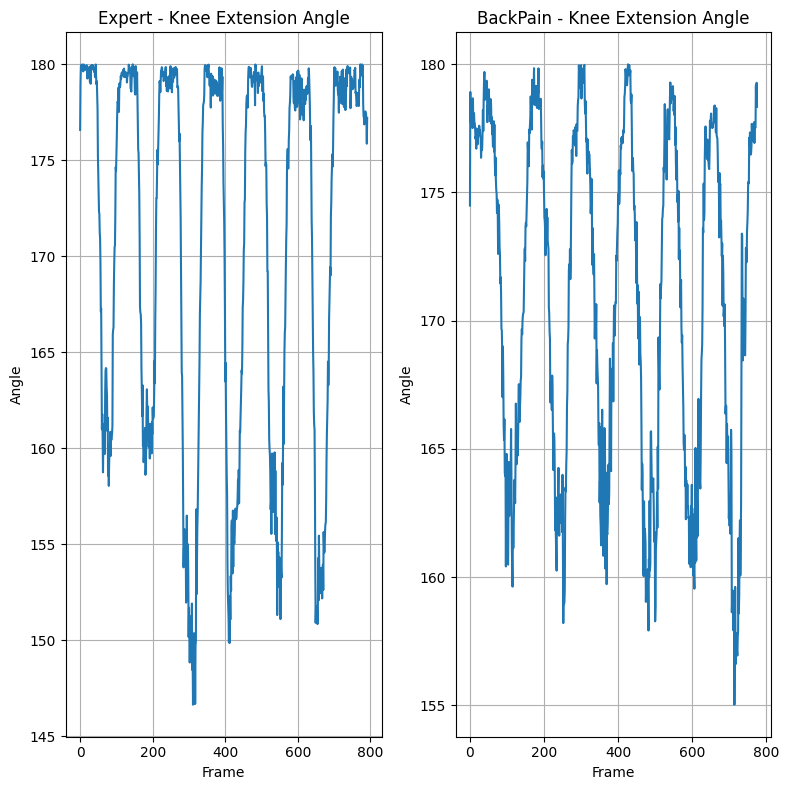

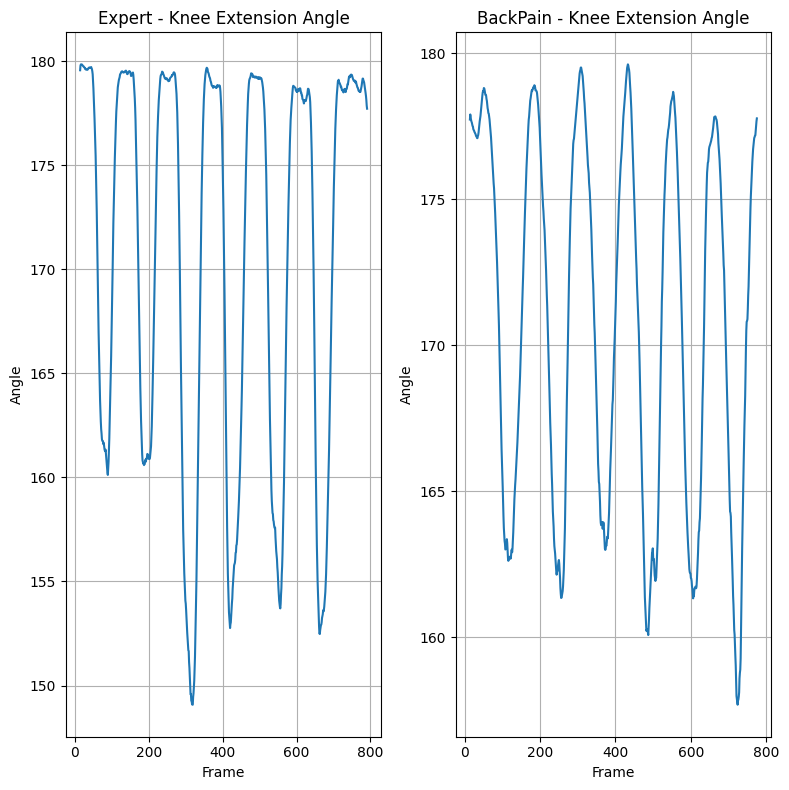

In [ ]:
plot_joint_positions(data, 'Es5', 'right_elbow')
print('\n\n')
plot_joint_positions(data, 'Es5', 'right_knee')
print('\n\n')
plot_joint_positions(data, 'Es5', 'right_elbow', smooth=True)
print('\n\n')
plot_joint_positions(data, 'Es5', 'right_knee', smooth=True)
print('\n\n')
plot_joint_features(data, 'Es5', 'right_knee_extension_angle')
print('\n\n')
plot_joint_features(data, 'Es5', 'right_knee_extension_angle', smooth=True)